In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
reviews_df = pd.read_csv('data/Amazon Reviews.csv')
reviews_df.head(1).transpose()

,0
id,AVqkIhwDv8e3D1O-lebb
name,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
asins,B01AHB9CN2
brand,Amazon
categories,"Electronics,iPad & Tablets,All Tablets,Fire Ta..."
keys,"841667104676,amazon/53004484,amazon/b01ahb9cn2..."
manufacturer,Amazon
reviews.date,2017-01-13T00:00:00.000Z
reviews.dateAdded,2017-07-03T23:33:15Z
reviews.dateSeen,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z"


In [13]:
reviews_df = reviews_df.drop(columns=['reviews.userCity', 'reviews.userProvince', 
                                      'reviews.id', 'reviews.didPurchase'],
                            axis=1)

In [14]:
reviews_df['reviews.text'].fillna(' ', inplace=True)

In [15]:
reviews_df["reviews.rating"] = reviews_df["reviews.rating"].apply(lambda x: 0 if x < 4 else 1)

<AxesSubplot:xlabel='reviews.rating', ylabel='count'>

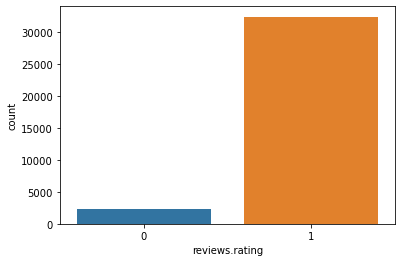

In [16]:
sns.countplot(reviews_df['reviews.rating'])

In [17]:
# print("Score negative (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==-1])/len(reviews_df['reviews.rating']),3)))
print("Score negative (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==0])/len(reviews_df['reviews.rating']),3)))
print("Score positive (%):" + str(round(len(reviews_df[reviews_df['reviews.rating']==1])/len(reviews_df['reviews.rating']),3)))

Score negative (%):0.067
Score positive (%):0.933


In [18]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string

from nltk.corpus import stopwords 
stemmer = nltk.stem.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')
ENGLISH_STOP_WORDS.remove('not')
ENGLISH_STOP_WORDS.remove('no')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [19]:
X = reviews_df['reviews.text']
y = reviews_df['reviews.rating']

In [20]:
from sklearn.model_selection import train_test_split

# Taking a chuck for our 20% test set
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

# Splitting the remainder in two chunks
X_train, X_validation, y_train, y_validation = train_test_split(X_remainder, 
                                                                y_remainder, 
                                                                stratify=y_remainder, test_size=0.25)

from sklearn.feature_extraction.text import CountVectorizer 
bagofwords = CountVectorizer(stop_words="english", min_df = 10, # ngram_range = (1,3),
                             tokenizer=my_tokenizer)
bagofwords.fit(X_train)
X_train = bagofwords.transform(X_train)
X_validation = bagofwords.transform(X_validation)
X_test = bagofwords.transform(X_test)
X_remainder = bagofwords.transform(X_remainder)

In [21]:
X_train = X_train.toarray()

In [22]:
X_validation = X_validation.toarray()

In [23]:
y_train.values

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
from sklearn.preprocessing import scale
import numpy as np
from keras.models import Sequential
from keras.layers import Dense



model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train.values, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, y_test.values))

score = model.evaluate(X_validation, y_validation.values, batch_size=128, verbose=2)
print (score[1])

Epoch 1/100
610/610 - 2s - loss: 0.2114 - accuracy: 0.9352 - val_loss: 0.1805 - val_accuracy: 0.9417
Epoch 2/100
610/610 - 2s - loss: 0.1321 - accuracy: 0.9547 - val_loss: 0.1989 - val_accuracy: 0.9369
Epoch 3/100
610/610 - 2s - loss: 0.0639 - accuracy: 0.9798 - val_loss: 0.2841 - val_accuracy: 0.9356
Epoch 4/100
610/610 - 2s - loss: 0.0243 - accuracy: 0.9928 - val_loss: 0.5025 - val_accuracy: 0.9295
Epoch 5/100
610/610 - 2s - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.5146 - val_accuracy: 0.9356
Epoch 6/100
610/610 - 2s - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.5652 - val_accuracy: 0.9280
Epoch 7/100
610/610 - 2s - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.4935 - val_accuracy: 0.9297
Epoch 8/100
610/610 - 2s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.6627 - val_accuracy: 0.9323
Epoch 9/100
610/610 - 2s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.6784 - val_accuracy: 0.9313
Epoch 10/100
610/610 - 2s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.6936 - val_accura

Epoch 80/100
610/610 - 2s - loss: 6.3371e-04 - accuracy: 0.9997 - val_loss: 2.0091 - val_accuracy: 0.9319
Epoch 81/100
610/610 - 2s - loss: 6.2843e-04 - accuracy: 0.9997 - val_loss: 2.1061 - val_accuracy: 0.9326
Epoch 82/100
610/610 - 2s - loss: 7.5126e-04 - accuracy: 0.9997 - val_loss: 1.7645 - val_accuracy: 0.9316
Epoch 83/100
610/610 - 2s - loss: 6.1848e-04 - accuracy: 0.9997 - val_loss: 1.9679 - val_accuracy: 0.9321
Epoch 84/100
610/610 - 3s - loss: 6.3403e-04 - accuracy: 0.9997 - val_loss: 1.9454 - val_accuracy: 0.9302
Epoch 85/100
610/610 - 2s - loss: 6.2957e-04 - accuracy: 0.9997 - val_loss: 2.0573 - val_accuracy: 0.9306
Epoch 86/100
610/610 - 3s - loss: 6.3305e-04 - accuracy: 0.9997 - val_loss: 2.1349 - val_accuracy: 0.9317
Epoch 87/100
610/610 - 2s - loss: 6.7489e-04 - accuracy: 0.9997 - val_loss: 2.0520 - val_accuracy: 0.9304
Epoch 88/100
610/610 - 2s - loss: 5.8321e-04 - accuracy: 0.9997 - val_loss: 2.4892 - val_accuracy: 0.9326
Epoch 89/100
610/610 - 2s - loss: 6.4642e-04 -

<br>
<br>

### Word embeddings with Word2Vec

In [38]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string

from nltk.corpus import stopwords 
stemmer = nltk.stem.PorterStemmer()
ENGLISH_STOP_WORDS = stopwords.words('english')
ENGLISH_STOP_WORDS.remove('not')
ENGLISH_STOP_WORDS.remove('no')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)
            
    #listofstemmed_words = np.array(listofstemmed_words)
    return listofstemmed_words

In [39]:
# Tokenize the text column to get the new column 'tokenized_text'

reviews_df['stemmed_tokens'] = [my_tokenizer(sentence) for sentence in reviews_df['reviews.text'].values]
reviews_df['stemmed_tokens'] .head(10)

0    [product, far, not, disappoint, children, love...
1    [great, beginn, experienc, person, bought, gif...
2    [inexpens, tablet, use, learn, step, nabi, thr...
3    [ive, fire, hd, 8, two, week, love, tablet, gr...
4    [bought, grand, daughter, come, visit, set, us...
5    [amazon, fire, 8, inch, tablet, perfect, size,...
6    [great, eread, go, nice, light, weight, price,...
7    [gave, christma, gift, inlaw, husband, uncl, l...
8    [great, devic, read, book, like, link, borrow,...
9                    [love, order, book, read, reader]
Name: stemmed_tokens, dtype: object

In [40]:
X = reviews_df['reviews.text']
y = reviews_df['reviews.rating']

In [28]:
# X = X.values.reshape((len(y), 1))

In [29]:
# y = y.values.reshape((len(y), 1))

In [41]:
from sklearn.model_selection import train_test_split

# Taking a chuck for our 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

In [42]:
X_train[0]

'This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.'

In [43]:
X_train.shape

(25995,)

In [44]:
X_train.values

array(["The text is easier to read and I don't have to have a light in order to read when the room light is dim or if it is dark.",
       "I love my Echo Tap! I have my own personal alarm, informs me on today's weather forcast and local events. Great purchase.",
       'Makes reading books easier. I love it! User friendly too!', ...,
       "We have had a Fire Stick for quite some time that we use for our Playstation Vue subscription. I decided to purchase the Fire TV as a second Playstation Vue device because it has the wired ethernet option, and WiFi isn't a reliably fast enough connection for the streaming services. The Fire TV performs wonderfully, and is much snappier in performance than the Stick even in the menus. Our Apple TV has now been unused for several months.",
       "I previously had bought an older model of these tablets for my children. I wasn't to happy with them. But this tablet is great, it has child safety features like wether you would like to have them surf the

In [45]:
X_train.groupby(X_train.map(type).eq(str)).count()

reviews.text
True    25995
Name: reviews.text, dtype: int64

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # equivalent to .fit(X_train)
sequences = tokenizer.texts_to_sequences(X_train) # equivalent to .transform(X_train) 

In [ ]:
# convert 2D arrays into tf dataset

In [47]:
import tensorflow as tf
train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [48]:
train_batches = train_data.shuffle(1000).padded_batch(36459)
test_batches = test_data.shuffle(1000).padded_batch(36459)

In [49]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([b'son is enjoying the whole tablet. He is glad it is a quality product, bought from our favorite store.',
       b'I have been very satisfied with my new kindle and use it almost every day!',
       b"Works great for Vue, and other apps if you don't have a smart TV. Better quality on Vue than my PS4",
       ...,
       b'I have enjoyed becoming familiar with all the services available on my kindle!',
       b"I have read books on my phone and IPad and Kindle.....but rarely would read long due to disraction of other apps and email.....or couldn't read outside because of glare.....well this product has solved all my problems.....no distractions....just read and read for hours now....and can comfortably read outside or on the back end of our motorcylce if I want becasue NO GLARE!!!!! Love it :)",
       b'I bought this for my ten year old daughter. This is so much better than carringing around a bunch of heavy books. The battery also lasts forever'],
      dtype=object)

In [50]:
from gensim.models import Word2Vec
import time
# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

# word2vec_model_file = 'word2vec_' + str(size) + '.model'
start_time = time.time()
stemmed_tokens = pd.Series(reviews_df['stemmed_tokens']).values
# Train the Word2Vec Model
w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
print("Time taken to train word2vec model: " + str(time.time() - start_time))
# model.save(word2vec_model_file)

Time taken to train word2vec model: 13.99494743347168


In [51]:
words = list(w2v_model.wv.vocab)
print('Vocabulary size: %d' % len(words))

Vocabulary size: 14225


In [54]:
from tensorflow import keras
from tensorflow.keras import layers

In [55]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(len(words), embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          227600    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 227,889
Trainable params: 227,889
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

Epoch 1/100


UnimplementedError:  Cast string to float is not supported
	 [[node sequential_1/Cast (defined at <ipython-input-56-371ca51ad9f7>:5) ]] [Op:__inference_train_function_182522]

Function call stack:
train_function
